## Introduction ##
Perkenalkan Saya AHmad Rafi Muzakki
Pada kesempatan mengerjakan final project 2 ini, saya akan mengerjakan dengan menggunakan dataset Cuaca di Australia
Dalam dataset ini kita akan melihat berbagai macam informasi terkait cuaca yang ada di Australia
objektif dalam project ini adalah dapat melakukan import dataset,data cleaning, preprocessing serta memberikan visual terhadap data
yang kemudian akan dilanjutkan dengan memberi implementasi dengan machine learning


### Import Libraries ##

In [16]:
## Importing Pandas Libraries
import pandas as pd
import numpy as np

### Visualization Library
import seaborn as sns
import matplotlib.pyplot as plt

### For Train and Modelling the Data
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

## Loading The Datasets ##

In [17]:
df = pd.read_csv(r'C:\Users\Acer\Documents\Hacktivist_Final Project\weatherAUS.csv')
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [19]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [20]:
df.corr()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
MinTemp,1.000000,0.736555,0.103938,0.466993,0.072586,0.177415,0.175064,0.175173,-0.232899,0.006089,-0.450970,-0.461292,0.078754,0.021605,0.901821,0.708906
MaxTemp,0.736555,1.000000,-0.074992,0.587932,0.470156,0.067615,0.014450,0.050300,-0.504110,-0.508855,-0.332061,-0.427167,-0.289370,-0.277921,0.887210,0.984503
Rainfall,0.103938,-0.074992,1.000000,-0.064351,-0.227549,0.133659,0.087338,0.057887,0.224405,0.255755,-0.168154,-0.126534,0.198528,0.172403,0.011192,-0.079657
Evaporation,0.466993,0.587932,-0.064351,1.000000,0.365602,0.203021,0.193084,0.129400,-0.504092,-0.390243,-0.270362,-0.293581,-0.183793,-0.182618,0.545115,0.572893
Sunshine,0.072586,0.470156,-0.227549,0.365602,1.000000,-0.034750,0.005499,0.053834,-0.490819,-0.629130,0.041970,-0.019719,-0.675323,-0.703930,0.291188,0.490501
WindGustSpeed,0.177415,0.067615,0.133659,0.203021,-0.034750,1.000000,0.605303,0.686307,-0.215070,-0.026327,-0.458744,-0.413749,0.071736,0.109168,0.150150,0.032748
WindSpeed9am,0.175064,0.014450,0.087338,0.193084,0.005499,0.605303,1.000000,0.519547,-0.270858,-0.031614,-0.228743,-0.175817,0.025112,0.054639,0.128545,0.004569
WindSpeed3pm,0.175173,0.050300,0.057887,0.129400,0.053834,0.686307,0.519547,1.000000,-0.145525,0.016432,-0.296351,-0.255439,0.053337,0.025396,0.163030,0.027778
Humidity9am,-0.232899,-0.504110,0.224405,-0.504092,-0.490819,-0.215070,-0.270858,-0.145525,1.000000,0.666949,0.139442,0.186858,0.452297,0.357326,-0.471354,-0.498399
Humidity3pm,0.006089,-0.508855,0.255755,-0.390243,-0.629130,-0.026327,-0.031614,0.016432,0.666949,1.000000,-0.027544,0.051997,0.517120,0.523120,-0.221019,-0.557841


## Data Cleansing ##

In [21]:
# Looking for missing values
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [22]:
# It looks like there so many missing values
## Then we have to fill the missing values with the mean
## Because there over thousand of missing values

df = df.fillna(df.mean())

C:\Users\Acer\AppData\Local\Temp/ipykernel_17940/329556166.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df = df.fillna(df.mean())


In [23]:
## After we fill the missing values, lets check it again one more time

df.isnull().sum()

Date                 0
Location             0
MinTemp              0
MaxTemp              0
Rainfall             0
Evaporation          0
Sunshine             0
WindGustDir      10326
WindGustSpeed        0
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am         0
WindSpeed3pm         0
Humidity9am          0
Humidity3pm          0
Pressure9am          0
Pressure3pm          0
Cloud9am             0
Cloud3pm             0
Temp9am              0
Temp3pm              0
RainToday         3261
RainTomorrow      3267
dtype: int64

In [24]:
## But there's still so many missing values
# then we have to do another method to make our data clean

null_pct = df.apply(pd.isnull).sum()/df.shape[0]
valid_col = df.columns[null_pct < 0.38]

print('We now have {} columns'.format(len(valid_col)))
print('The columns are:')
print(valid_col)

We now have 23 columns
The columns are:
Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')


In [25]:
df = df[valid_col]

In [26]:
df.shape

(145460, 23)

In [27]:
# removing rows where target variable is null

df.dropna(how='all', subset=['RainTomorrow'], inplace= True)

In [28]:
num_col = [col for col in df.columns if df[col].dtypes !='O']
num_col

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm']

In [29]:
## Filling the null values again with median
df[num_col] = df[num_col].fillna(df[num_col].median())

In [30]:
## Now lets check again the null values
df.isnull().sum()

Date                 0
Location             0
MinTemp              0
MaxTemp              0
Rainfall             0
Evaporation          0
Sunshine             0
WindGustDir       9330
WindGustSpeed        0
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am         0
WindSpeed3pm         0
Humidity9am          0
Humidity3pm          0
Pressure9am          0
Pressure3pm          0
Cloud9am             0
Cloud3pm             0
Temp9am              0
Temp3pm              0
RainToday         1406
RainTomorrow         0
dtype: int64

### Now we succeed to clean our data ###

In [31]:
# Convert date column to datetime

df['Date']= pd.to_datetime(df['Date'])

In [32]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Week'] = df['Date'].dt.weekday
df['Day'] = df['Date'].dt.day

In [33]:
df.drop('Date', axis=1, inplace=True)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142193 entries, 0 to 145458
Data columns (total 26 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       142193 non-null  object 
 1   MinTemp        142193 non-null  float64
 2   MaxTemp        142193 non-null  float64
 3   Rainfall       142193 non-null  float64
 4   Evaporation    142193 non-null  float64
 5   Sunshine       142193 non-null  float64
 6   WindGustDir    132863 non-null  object 
 7   WindGustSpeed  142193 non-null  float64
 8   WindDir9am     132180 non-null  object 
 9   WindDir3pm     138415 non-null  object 
 10  WindSpeed9am   142193 non-null  float64
 11  WindSpeed3pm   142193 non-null  float64
 12  Humidity9am    142193 non-null  float64
 13  Humidity3pm    142193 non-null  float64
 14  Pressure9am    142193 non-null  float64
 15  Pressure3pm    142193 non-null  float64
 16  Cloud9am       142193 non-null  float64
 17  Cloud3pm       142193 non-nul

In [35]:
### Lets try to see between categorical column and numerical column
# Categorical column
categorical_col = [col for col in df.columns if df[col].dtypes =='O']

print('There are {} categorical columns'.format(len(categorical_col)))
print('----------------------------------------------------------------')
print('The categorical columns are:', categorical_col)

There are 6 categorical columns
----------------------------------------------------------------
The categorical columns are: ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [36]:
numerical_col = [col for col in df.columns if df[col].dtypes !='O']

print('There are {} numerical columns'.format(len(numerical_col)))
print('----------------------------------------------------------------')
print('The categorical columns are:', numerical_col)

There are 20 numerical columns
----------------------------------------------------------------
The categorical columns are: ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'Year', 'Month', 'Week', 'Day']


# Exploratory Data Analysis #

In [37]:
### Lets make datasets for categorical data
df_categorical = df[['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']]

<Figure size 2160x2160 with 0 Axes>

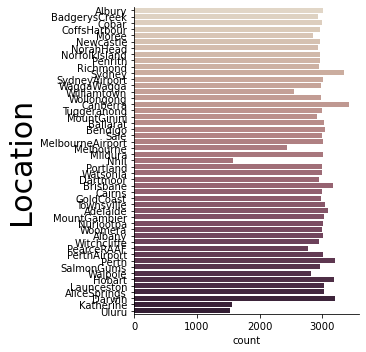

In [38]:
plt.figure(figsize=(30, 30))
sns.catplot(data=df_categorical, y="Location", kind="count", palette="ch:.25")
plt.ylabel('Location', fontsize=30)
plt.show()

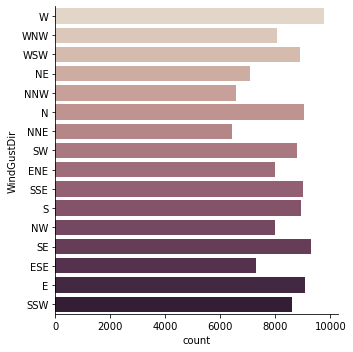

In [39]:
sns.catplot(data=df_categorical, y="WindGustDir", kind="count", palette="ch:.22")

In [40]:
### Lets take a look for Numerical Data
df_numerical = df[['MinTemp','MaxTemp','Rainfall','WindGustSpeed','WindSpeed9am',
                        'WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am',
                        'Pressure3pm','Temp9am','Temp3pm']]
df_numerical

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm
0,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8
1,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3
2,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2
3,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5
4,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7
...,...,...,...,...,...,...,...,...,...,...,...,...
145454,3.5,21.8,0.0,31.0,15.0,13.0,59.0,27.0,1024.7,1021.2,9.4,20.9
145455,2.8,23.4,0.0,31.0,13.0,11.0,51.0,24.0,1024.6,1020.3,10.1,22.4
145456,3.6,25.3,0.0,22.0,13.0,9.0,56.0,21.0,1023.5,1019.1,10.9,24.5
145457,5.4,26.9,0.0,37.0,9.0,9.0,53.0,24.0,1021.0,1016.8,12.5,26.1


c:\Users\Acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\Acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\Acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\Acer\anaconda3\lib\site-p

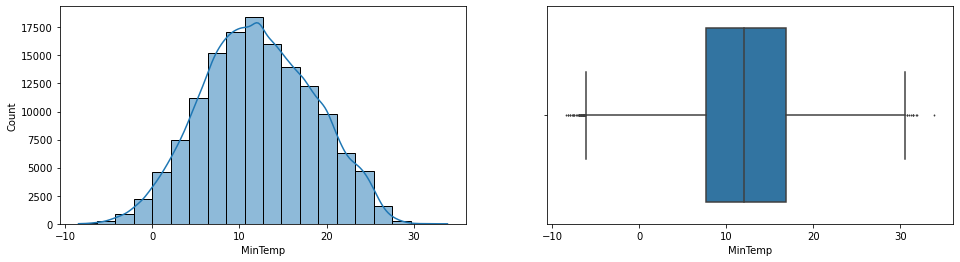

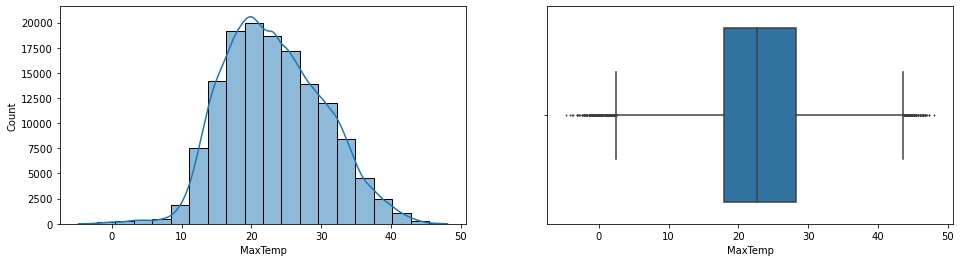

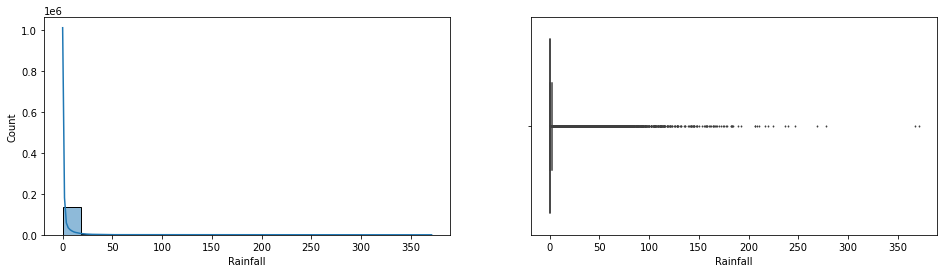

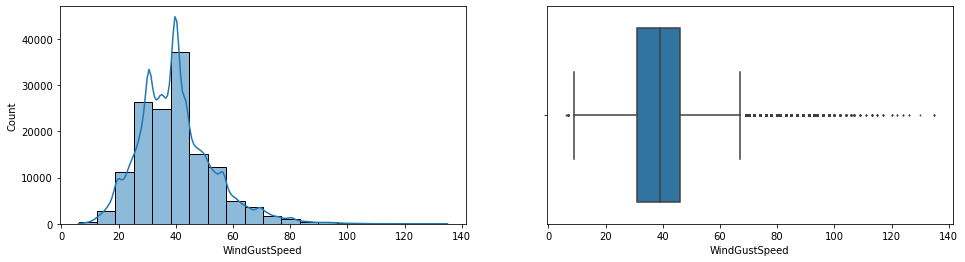

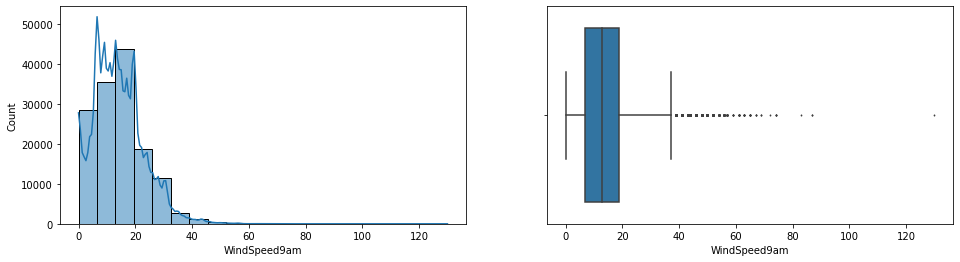

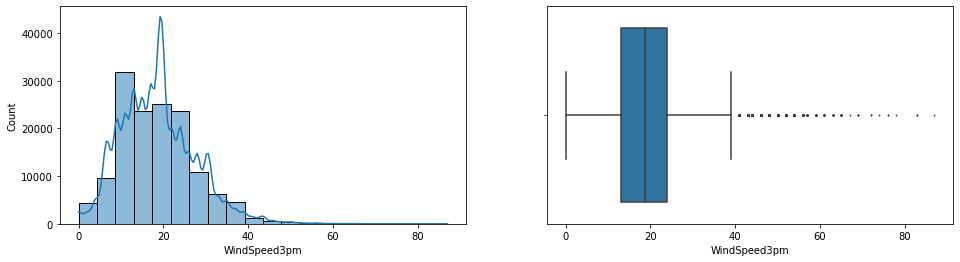

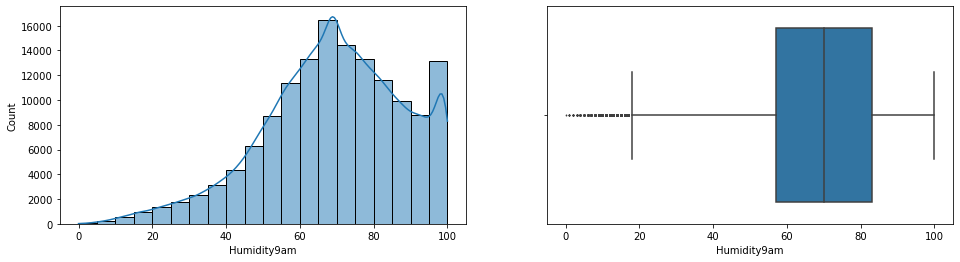

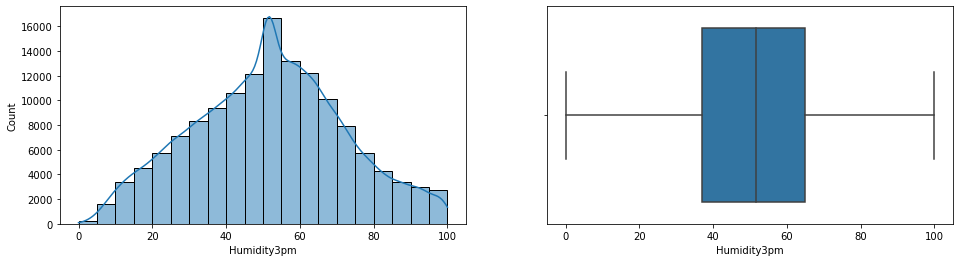

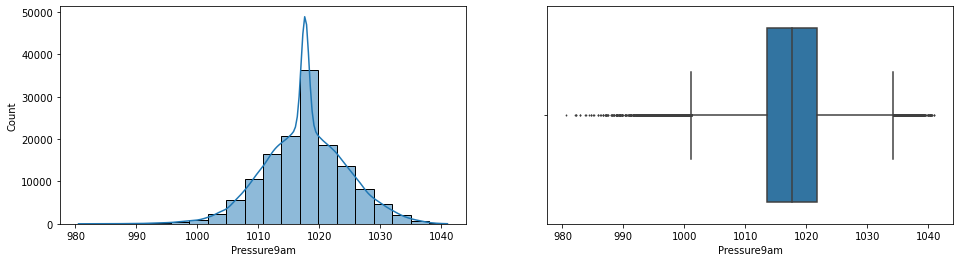

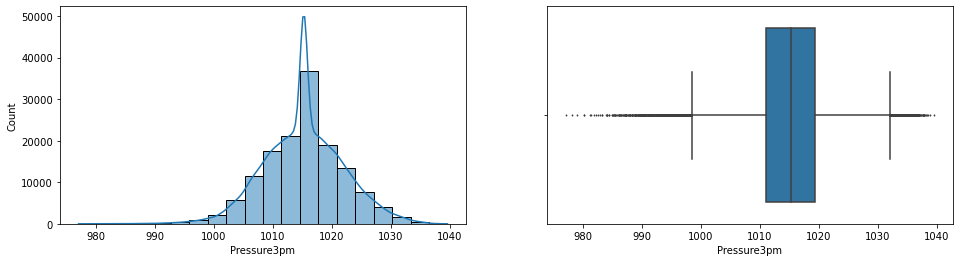

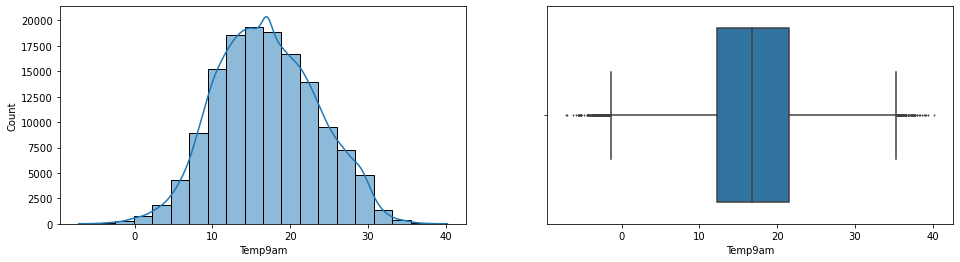

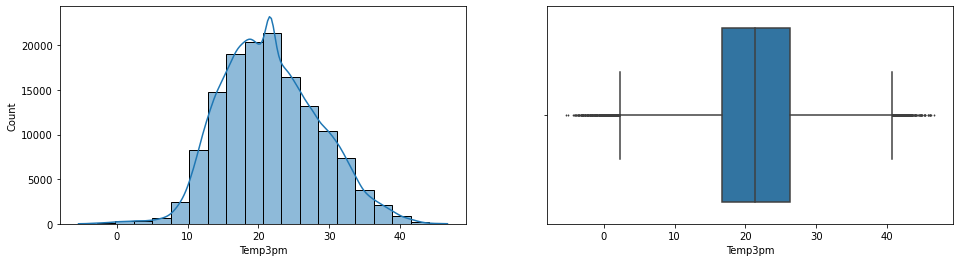

In [41]:
for col in df_numerical:
    fig, ax = plt.subplots(1,2, figsize=(16, 4))

    sns.histplot(df[col], bins=20, kde=True, ax=ax[0])

    sns.boxplot(df[col], fliersize=1, ax=ax[1])

## Data Preprocessing ##

In [42]:
### Before we train our datasets
## Lets remove the outlier in the data
num_col_new =[col for col in df.columns if df[col].dtypes !='O']
num_col_new

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'Year',
 'Month',
 'Week',
 'Day']

In [43]:
Q1 = df[num_col_new].quantile(0.25)
Q3 =df[num_col_new].quantile(0.75)
IQR = Q3 - Q1
df_no_outliers = df[~((df[num_col_new] < (Q1 - 1.5 * IQR)) | (df[num_col_new] > (Q3 + 1.5 * IQR))).any(axis=1)]
df_no_outliers.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Week,Day
0,Albury,13.4,22.9,0.6,5.468232,7.611178,W,44.0,W,WNW,...,8.000000,4.50993,16.9,21.8,No,No,2008,12,0,1
1,Albury,7.4,25.1,0.0,5.468232,7.611178,WNW,44.0,NNW,WSW,...,4.447461,4.50993,17.2,24.3,No,No,2008,12,1,2
2,Albury,12.9,25.7,0.0,5.468232,7.611178,WSW,46.0,W,WSW,...,4.447461,2.00000,21.0,23.2,No,No,2008,12,2,3
3,Albury,9.2,28.0,0.0,5.468232,7.611178,NE,24.0,SE,E,...,4.447461,4.50993,18.1,26.5,No,No,2008,12,3,4
4,Albury,17.5,32.3,1.0,5.468232,7.611178,W,41.0,ENE,NW,...,7.000000,8.00000,17.8,29.7,No,No,2008,12,4,5


In [44]:
df_no_outliers.shape

(63375, 26)

In [45]:
# Encoding rain tomorrow col


le =  LabelEncoder()

df_no_outliers['RainTomorrow'] = le.fit_transform(df_no_outliers['RainTomorrow'])


# Encoding rain today col
df_no_outliers['RainToday'] = le.fit_transform(df_no_outliers['RainToday'])

df_no_outliers

C:\Users\Acer\AppData\Local\Temp/ipykernel_17940/3751353791.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers['RainTomorrow'] = le.fit_transform(df_no_outliers['RainTomorrow'])
C:\Users\Acer\AppData\Local\Temp/ipykernel_17940/3751353791.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers['RainToday'] = le.fit_transform(df_no_outliers['RainToday'])


,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Week,Day
0,Albury,13.4,22.9,0.6,5.468232,7.611178,W,44.0,W,WNW,...,8.000000,4.50993,16.9,21.8,0,0,2008,12,0,1
1,Albury,7.4,25.1,0.0,5.468232,7.611178,WNW,44.0,NNW,WSW,...,4.447461,4.50993,17.2,24.3,0,0,2008,12,1,2
2,Albury,12.9,25.7,0.0,5.468232,7.611178,WSW,46.0,W,WSW,...,4.447461,2.00000,21.0,23.2,0,0,2008,12,2,3
3,Albury,9.2,28.0,0.0,5.468232,7.611178,NE,24.0,SE,E,...,4.447461,4.50993,18.1,26.5,0,0,2008,12,3,4
4,Albury,17.5,32.3,1.0,5.468232,7.611178,W,41.0,ENE,NW,...,7.000000,8.00000,17.8,29.7,0,0,2008,12,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,Uluru,3.5,21.8,0.0,5.468232,7.611178,E,31.0,ESE,E,...,4.447461,4.50993,9.4,20.9,0,0,2017,6,1,20
145455,Uluru,2.8,23.4,0.0,5.468232,7.611178,E,31.0,SE,ENE,...,4.447461,4.50993,10.1,22.4,0,0,2017,6,2,21
145456,Uluru,3.6,25.3,0.0,5.468232,7.611178,NNW,22.0,SE,N,...,4.447461,4.50993,10.9,24.5,0,0,2017,6,3,22
145457,Uluru,5.4,26.9,0.0,5.468232,7.611178,N,37.0,SE,WNW,...,4.447461,4.50993,12.5,26.1,0,0,2017,6,4,23


In [46]:
cat_col = ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']


In [47]:
dummies = pd.get_dummies(df_no_outliers, cat_col, drop_first=True)
final_df = dummies
final_df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,13.4,22.9,0.6,5.468232,7.611178,44.0,20.0,24.0,71.0,22.0,...,0,0,0,0,0,0,0,0,1,0
1,7.4,25.1,0.0,5.468232,7.611178,44.0,4.0,22.0,44.0,25.0,...,0,0,0,0,0,0,0,0,0,1
2,12.9,25.7,0.0,5.468232,7.611178,46.0,19.0,26.0,38.0,30.0,...,0,0,0,0,0,0,0,0,0,1
3,9.2,28.0,0.0,5.468232,7.611178,24.0,11.0,9.0,45.0,16.0,...,0,0,0,0,0,0,0,0,0,0
4,17.5,32.3,1.0,5.468232,7.611178,41.0,7.0,20.0,82.0,33.0,...,0,1,0,0,0,0,0,0,0,0


In [48]:
X = final_df.drop(['RainTomorrow'], axis=1)
Y = final_df['RainTomorrow']
X.shape, Y.shape

((63375, 114), (63375,))

In [49]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((50700, 114), (12675, 114), (50700,), (12675,))

In [50]:
parsams_lr = {'solver':'liblinear',
               'multi_class':'auto',
               'penalty': 'l1'}

logreg  =  LogisticRegression(**parsams_lr)

# Training model
logreg.fit(X_train, Y_train)

# Predicting of training and test data
x_train_preds = logreg.predict(X_train)
x_test_preds = logreg.predict(X_test)

c:\Users\Acer\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [51]:
# Accuracy score
train_logreg_accuracy = accuracy_score(Y_train, x_train_preds)

print('Accuracy of logisticsRegression training data:', round(train_logreg_accuracy*100, 2),'%')
print('=========================================================')

test_logreg_accuracy = accuracy_score(Y_test, x_test_preds )
print('Accuracy of logisticsRegression test data:', round(test_logreg_accuracy*100,2),'%')

Accuracy of logisticsRegression training data: 87.09 %
Accuracy of logisticsRegression test data: 87.23 %


### With logistic regression model, we can conclude our data is good enough
### And logistic regression is one of the compatible model in this datasets because we have 87% accuracy